In [1]:
# Importing helping libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_train = pd.read_csv('/content/drive/MyDrive/Reescalado/Train.csv').iloc[:,1:]
x_test = pd.read_csv('/content/drive/MyDrive/Reescalado/Test.csv').iloc[:,1:]

In [3]:
l_1 = x_train.iloc[:,0:3].values.tolist()
l_2 = x_train.iloc[:,3:6].values.tolist()
l_3 = x_train.iloc[:,6:9].values.tolist()
l_4 = x_train.iloc[:,9:12].values.tolist()
l_5 = x_train.iloc[:,12:15].values.tolist()
l_6 = x_train.iloc[:,15:18].values.tolist()
l_7 = x_train.iloc[:,18:21].values.tolist()
l_8 = x_train.iloc[:,21:].values.tolist()

x_train = np.array([l_1,l_2,l_3,l_4,l_5,l_6,l_7,l_8])

In [4]:
l_1_ = x_test.iloc[:,0:3].values.tolist()
l_2_ = x_test.iloc[:,3:6].values.tolist()
l_3_ = x_test.iloc[:,6:9].values.tolist()
l_4_ = x_test.iloc[:,9:12].values.tolist()
l_5_ = x_test.iloc[:,12:15].values.tolist()
l_6_ = x_test.iloc[:,15:18].values.tolist()
l_7_ = x_test.iloc[:,18:21].values.tolist()
l_8_ = x_test.iloc[:,21:].values.tolist()

x_test = np.array([l_1_,l_2_,l_3_,l_4_,l_5_,l_6_,l_7_,l_8_])

In [5]:
x_train = x_train.reshape(2774716, 3, 8)
x_test = x_test.reshape(1070247, 3, 8)

In [6]:
# Setting input shape
inp_size = 8
inp = tf.keras.Input(shape=(3, 8))

from tensorflow.keras import regularizers

# Setting layers for autoencoders
encoded = tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=regularizers.l2(1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5))(inp)
encoded = tf.keras.layers.Dense(16, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(20, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(units = inp_size, activation='sigmoid')(decoded)

# Autoencoder and encoder
autoencoder = tf.keras.Model(inp, decoded)
encoder = tf.keras.Model(inp, encoded)

# Check summary
autoencoder.summary()
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3, 8)]            0         
_________________________________________________________________
dense (Dense)                (None, 3, 20)             180       
_________________________________________________________________
dense_1 (Dense)              (None, 3, 16)             336       
_________________________________________________________________
dense_2 (Dense)              (None, 3, 20)             340       
_________________________________________________________________
dense_3 (Dense)              (None, 3, 8)              168       
Total params: 1,024
Trainable params: 1,024
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape 

In [7]:
autoencoder.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Fit an autoencoder 
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=512,
                shuffle=False,
                validation_data=(x_test, x_test))

Epoch 1/10
5420/5420 [==============================] - 26s 4ms/step - loss: 8.6093e-04 - accuracy: 0.9241 - val_loss: 8.0614e-05 - val_accuracy: 0.9777
Epoch 2/10
5420/5420 [==============================] - 22s 4ms/step - loss: 5.6784e-05 - accuracy: 0.9844 - val_loss: 5.5358e-05 - val_accuracy: 0.9763
Epoch 3/10
5420/5420 [==============================] - 22s 4ms/step - loss: 4.3784e-05 - accuracy: 0.9825 - val_loss: 4.7401e-05 - val_accuracy: 0.9778
Epoch 4/10
5420/5420 [==============================] - 22s 4ms/step - loss: 3.9313e-05 - accuracy: 0.9816 - val_loss: 4.3421e-05 - val_accuracy: 0.9800
Epoch 5/10
5420/5420 [==============================] - 22s 4ms/step - loss: 3.6788e-05 - accuracy: 0.9803 - val_loss: 4.1318e-05 - val_accuracy: 0.9794
Epoch 6/10
5420/5420 [==============================] - 22s 4ms/step - loss: 3.5197e-05 - accuracy: 0.9801 - val_loss: 3.9886e-05 - val_accuracy: 0.9792
Epoch 7/10
5420/5420 [==============================] - 22s 4ms/step - loss: 3.423

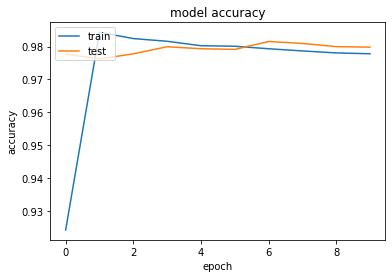

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

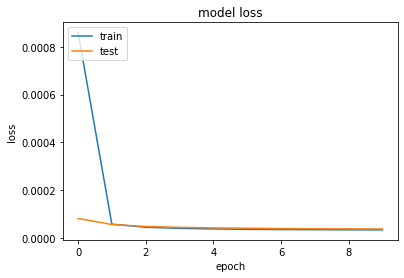

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
autoencoder.save('auto.h5')

In [ ]:
# Setting input shape
inp_size = 8
inp = tf.keras.Input(shape=(3, 8))

from tensorflow.keras import regularizers

# Setting layers for autoencoders
encoded = tf.keras.layers.Dense(24, activation='relu', kernel_regularizer=regularizers.l2(1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5))(inp)
encoded = tf.keras.layers.Dense(23, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(24, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(units = inp_size, activation='sigmoid')(decoded)

# Autoencoder and encoder
autoencoder = tf.keras.Model(inp, decoded)
encoder = tf.keras.Model(inp, encoded)

# Check summary
autoencoder.summary()
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3, 8)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 3, 24)             216       
_________________________________________________________________
dense_5 (Dense)              (None, 3, 23)             575       
_________________________________________________________________
dense_6 (Dense)              (None, 3, 24)             576       
_________________________________________________________________
dense_7 (Dense)              (None, 3, 8)              200       
Total params: 1,567
Trainable params: 1,567
Non-trainable params: 0
_________________________________________________________________
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shap

In [ ]:
autoencoder.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Fit an autoencoder 
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=512,
                shuffle=False,
                validation_data=(x_test, x_test))

5420/5420 [==============================] - 18s 3ms/step - loss: 3.3933e-05 - accuracy: 0.9727 - val_loss: 3.6068e-05 - val_accuracy: 0.9781
Epoch 20/50
5420/5420 [==============================] - 18s 3ms/step - loss: 3.3980e-05 - accuracy: 0.9725 - val_loss: 3.5952e-05 - val_accuracy: 0.9793
Epoch 21/50
5420/5420 [==============================] - 18s 3ms/step - loss: 3.3844e-05 - accuracy: 0.9729 - val_loss: 3.5981e-05 - val_accuracy: 0.9783
Epoch 22/50
5420/5420 [==============================] - 18s 3ms/step - loss: 3.4056e-05 - accuracy: 0.9730 - val_loss: 3.6244e-05 - val_accuracy: 0.9756
Epoch 23/50
5420/5420 [==============================] - 20s 4ms/step - loss: 3.3846e-05 - accuracy: 0.9731 - val_loss: 3.5088e-05 - val_accuracy: 0.9803
Epoch 24/50
5420/5420 [==============================] - 18s 3ms/step - loss: 3.3746e-05 - accuracy: 0.9728 - val_loss: 3.5384e-05 - val_accuracy: 0.9802
Epoch 25/50
5420/5420 [==============================] - 18s 3ms/step - loss: 3.3971e-05

In [ ]:
x_test1 = pd.read_csv('/content/drive/MyDrive/Reescalado/rb.csv').iloc[:,1:]

In [ ]:
l_1_ = x_test1.iloc[:,0:3].values.tolist()
l_2_ = x_test1.iloc[:,3:6].values.tolist()
l_3_ = x_test1.iloc[:,6:9].values.tolist()
l_4_ = x_test1.iloc[:,9:12].values.tolist()
l_5_ = x_test1.iloc[:,12:15].values.tolist()
l_6_ = x_test1.iloc[:,15:18].values.tolist()
l_7_ = x_test1.iloc[:,18:21].values.tolist()
l_8_ = x_test1.iloc[:,21:].values.tolist()

x_test1 = np.array([l_1_,l_2_,l_3_,l_4_,l_5_,l_6_,l_7_,l_8_])

In [ ]:
x_test1.shape

(8, 9910, 3)

In [ ]:
x_test1 = x_test1.reshape(9910, 3, 8)

In [ ]:
x_predict1 = autoencoder.predict(x_test1)

In [ ]:
 mse1 = tf.keras.losses.MeanAbsoluteError()

In [ ]:
mse1(x_test1, x_predict1).numpy()

0.0040505347

In [ ]:
 mse12 = tf.keras.losses.MeanAbsoluteError()
 mse12(x_test1, x_predict1).numpy()

0.0050924555

In [ ]:
 mse2 = tf.keras.losses.MeanAbsoluteError()
 mse2(x_test1, x_predict1).numpy()

0.0068542003

In [ ]:
 mse3 = tf.keras.losses.MeanAbsoluteError()
 mse3(x_test1, x_predict1).numpy()

0.004785619